In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
import torch
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import importlib
import os
from tqdm import tqdm
from collections import OrderedDict
import re
%matplotlib notebook
import json
import sys
# import imp
import random
import copy
import matplotlib

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
device = torch.device('cuda:0')
print(torch.cuda.get_device_name(torch.device('cuda:0')))

NVIDIA GeForce RTX 3090


In [4]:
# sys.path.remove('/home/phil/Desktop/profile-predict/')

# Load model

In [5]:
ens_names = ['beta-NLL_wd-0.0',
             'beta-NLL_wd-0.01',
             'beta-NLL_wd-0.1',
             'beta-NLL_wd-1.0',
             'beta-NLL_wd-2.0',
             'beta-NLL_wd-4.0',
             'beta-NLL_wd-6.0',
             'beta-NLL_wd-8.0',
             'beta-NLL_wd-10.0',
             'beta-NLL_wd-20.0',
             'beta-NLL_wd-30.0',
             'beta-NLL_wd-40.0',
             'beta-NLL_wd-50.0']

In [6]:
wd = [0.0, 0.01, 0.1, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 20.0, 30.0, 40.0, 50.0]

In [7]:
# ens_name = 'ens_DRcombo_03_cv-0'
os.chdir('/home/phil/Desktop/profile-predict/PP1/training_runs/')

In [8]:
runs = []
for n in ens_names:
    r = sorted(os.listdir(n))
    if 'plots' in r:
        r.remove('plots')
    runs.append(r)

In [9]:
model_paths = []
for i in range(len(ens_names)):
    model_paths.append([ens_names[i] + "/" + r for r in runs[i]])

model_version = 'checkpoints/model-best'
model_version = 'checkpoints/model-499-738'


In [10]:
model_paths

[['beta-NLL_wd-0.0/2024-09-11_16h-34m-43s',
  'beta-NLL_wd-0.0/2024-09-11_17h-06m-22s',
  'beta-NLL_wd-0.0/2024-09-11_17h-37m-46s',
  'beta-NLL_wd-0.0/2024-09-11_18h-09m-16s',
  'beta-NLL_wd-0.0/2024-09-11_18h-40m-47s'],
 ['beta-NLL_wd-0.01/2024-09-05_00h-57m-31s',
  'beta-NLL_wd-0.01/2024-09-05_01h-38m-24s',
  'beta-NLL_wd-0.01/2024-09-05_02h-19m-49s',
  'beta-NLL_wd-0.01/2024-09-05_03h-01m-08s',
  'beta-NLL_wd-0.01/2024-09-05_03h-42m-33s'],
 ['beta-NLL_wd-0.1/2024-09-04_16h-50m-11s',
  'beta-NLL_wd-0.1/2024-09-04_17h-41m-32s',
  'beta-NLL_wd-0.1/2024-09-04_18h-32m-49s',
  'beta-NLL_wd-0.1/2024-09-04_19h-24m-15s',
  'beta-NLL_wd-0.1/2024-09-04_20h-15m-33s'],
 ['beta-NLL_wd-1.0/2024-09-04_16h-40m-49s',
  'beta-NLL_wd-1.0/2024-09-04_17h-29m-10s',
  'beta-NLL_wd-1.0/2024-09-04_18h-20m-35s',
  'beta-NLL_wd-1.0/2024-09-04_19h-11m-53s',
  'beta-NLL_wd-1.0/2024-09-04_20h-03m-11s'],
 ['beta-NLL_wd-2.0/2024-09-04_01h-25m-56s',
  'beta-NLL_wd-2.0/2024-09-04_02h-17m-14s',
  'beta-NLL_wd-2.0/2024

## Check validation MSE

In [11]:
losses_train = {}
losses_test = {}
losses_valid = {}
for i, ens in enumerate(ens_names):
    temp_losses_train = []
    temp_losses_test = []
    temp_losses_valid = []
    for model_path in model_paths[i]:
        try:
            temp_losses_train.append(np.load('' + model_path + '/losses.npz')['mse_train'])
            temp_losses_test.append(np.load('' + model_path + '/losses.npz')['mse_test'])
            temp_losses_valid.append(np.load('' + model_path + '/losses.npz')['mse_valid'])
        except:
            model_paths[i].remove(model_path)
    losses_train[ens] = temp_losses_train
    losses_test[ens] = temp_losses_test
    losses_valid[ens] = temp_losses_valid

<IPython.core.display.Javascript object>


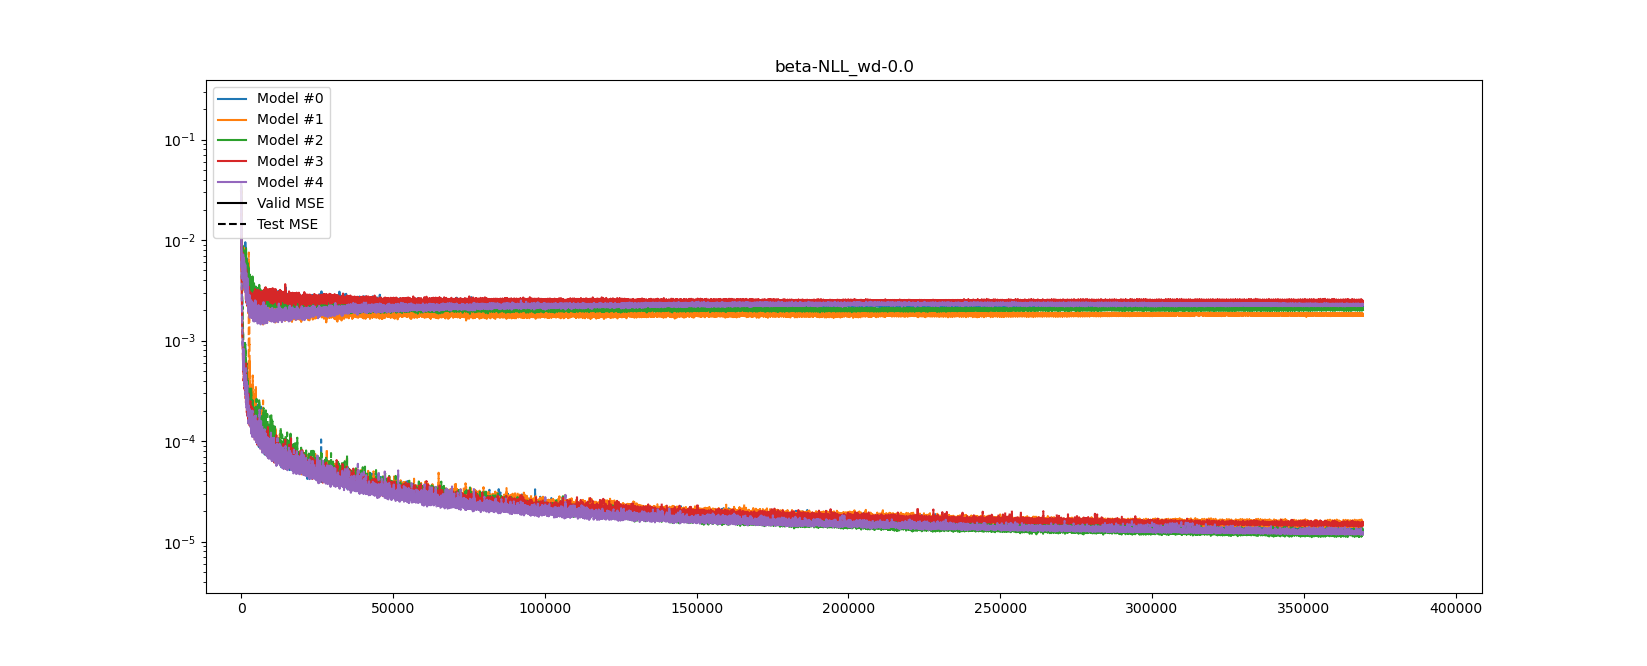

<IPython.core.display.Javascript object>


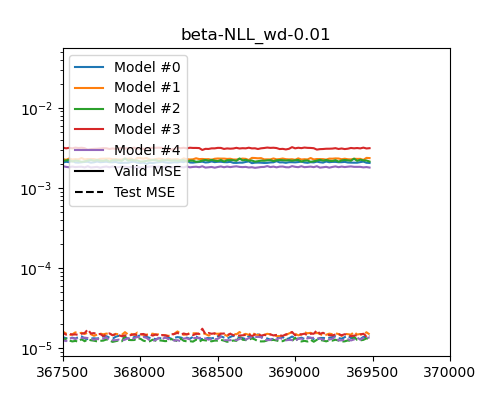

<IPython.core.display.Javascript object>


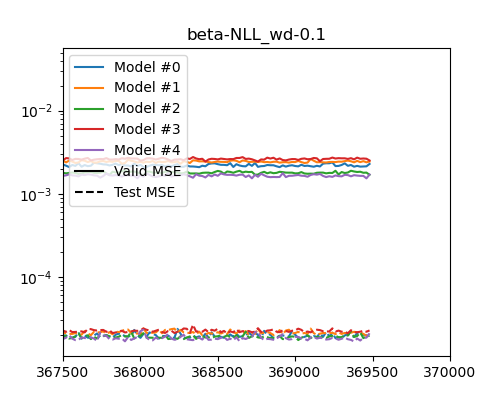

<IPython.core.display.Javascript object>


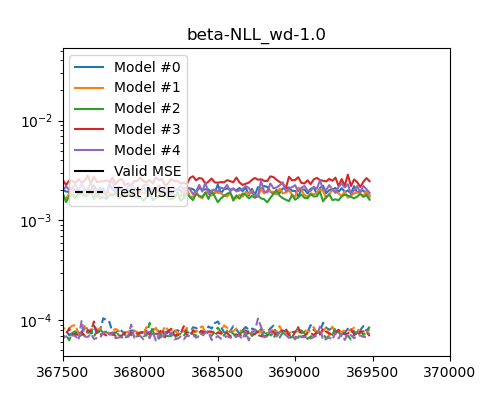

<IPython.core.display.Javascript object>


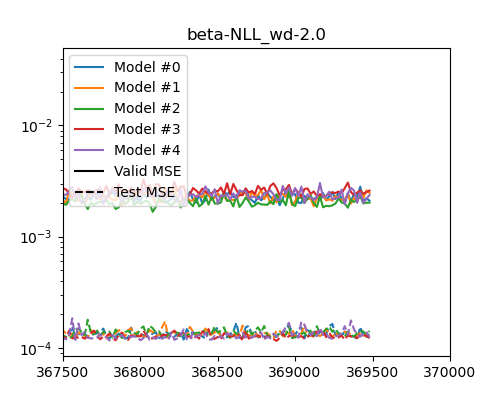

/tmp/ipykernel_646352/3179020817.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,4))


<IPython.core.display.Javascript object>


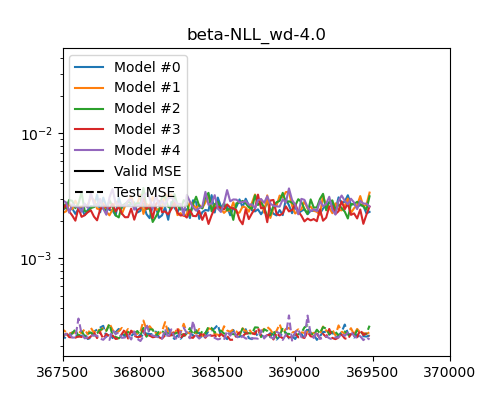

<IPython.core.display.Javascript object>


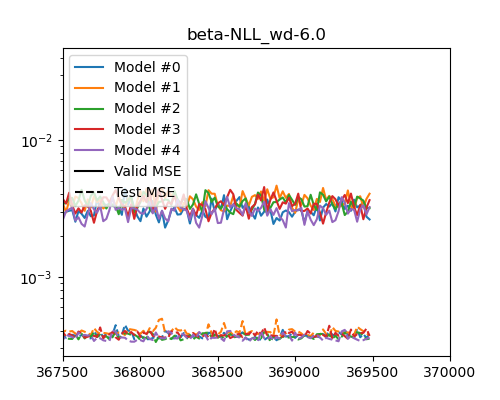

<IPython.core.display.Javascript object>


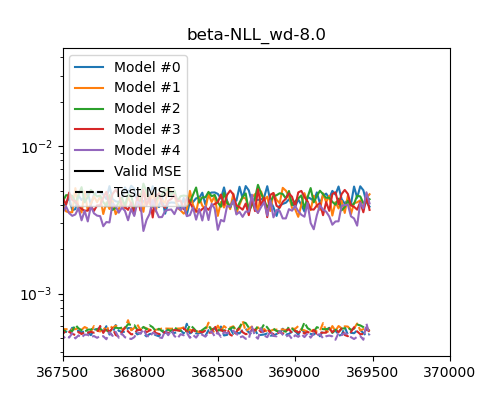

<IPython.core.display.Javascript object>


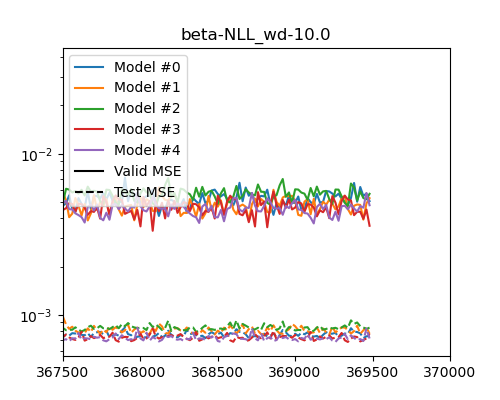

<IPython.core.display.Javascript object>


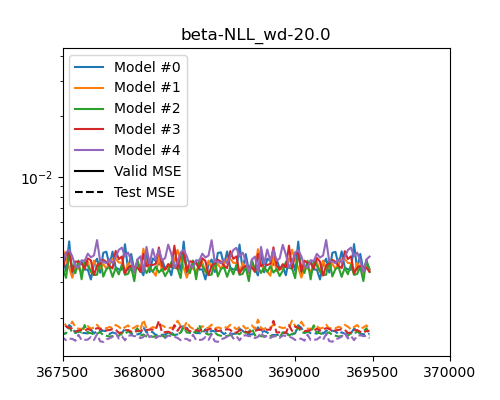

<IPython.core.display.Javascript object>


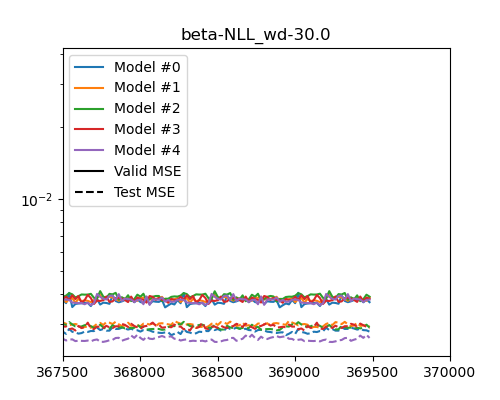

<IPython.core.display.Javascript object>


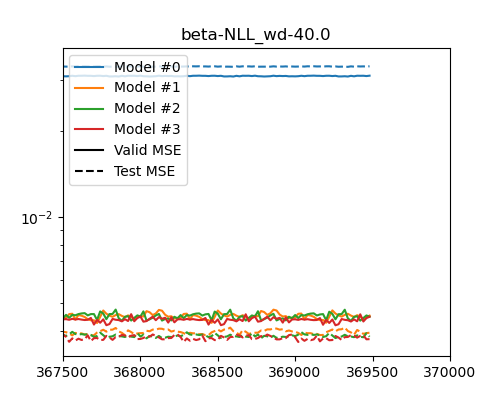

<IPython.core.display.Javascript object>


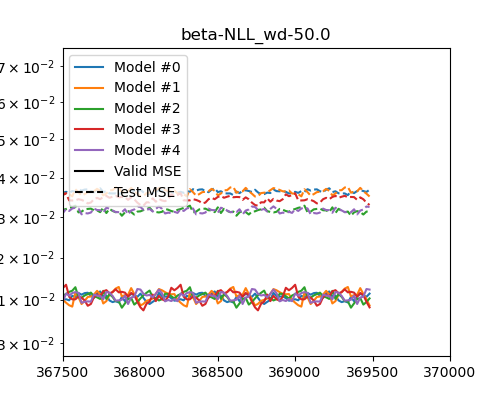

In [75]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

for k in range(len(ens_names)):
    plt.figure(figsize=(5,4))
    plt.title(ens_names[k])
    for i in range(len(model_paths[k])):
        plt.plot(losses_valid[ens_names[k]][i][:, 2],
                 losses_valid[ens_names[k]][i][:, 3], color=colors[i], label='Model #{}'.format(i))

        plt.plot(losses_test[ens_names[k]][i][:, 2],
                 losses_test[ens_names[k]][i][:, 3], linestyle='dashed', color=colors[i])
    plt.plot([], [], linestyle='solid', color='black', label='Valid MSE')
    plt.plot([], [], linestyle='dashed', color='black', label='Test MSE')
    plt.yscale('log')
    plt.xlim(367500, 370000)
#     plt.ylim(1e-5, 1e2)
    plt.legend(loc='upper left')

In [13]:
del model_paths[-2][0]

In [14]:
for k in range(len(ens_names)):
    print(ens_names[k])
    for i in range(len(model_paths[k])):
        print("{}: ".format(i), end='')
        print(losses_valid[ens_names[k]][i][-1:, 3])

beta-NLL_wd-0.0
0: [0.00220315]
1: [0.00178134]
2: [0.00203032]
3: [0.0024651]
4: [0.00229644]
beta-NLL_wd-0.01
0: [0.00204534]
1: [0.00235277]
2: [0.00213061]
3: [0.00312852]
4: [0.00179224]
beta-NLL_wd-0.1
0: [0.00228492]
1: [0.00244381]
2: [0.00169002]
3: [0.00251382]
4: [0.00170486]
beta-NLL_wd-1.0
0: [0.00177878]
1: [0.001698]
2: [0.001611]
3: [0.00246817]
4: [0.00188726]
beta-NLL_wd-2.0
0: [0.00210029]
1: [0.00246845]
2: [0.00202265]
3: [0.00259586]
4: [0.00236761]
beta-NLL_wd-4.0
0: [0.00235907]
1: [0.00336287]
2: [0.00314202]
3: [0.00259777]
4: [0.00260648]
beta-NLL_wd-6.0
0: [0.00262639]
1: [0.00404921]
2: [0.0031771]
3: [0.00363481]
4: [0.00323278]
beta-NLL_wd-8.0
0: [0.00388668]
1: [0.00471903]
2: [0.00436657]
3: [0.0036947]
4: [0.00408869]
beta-NLL_wd-10.0
0: [0.00509883]
1: [0.00531533]
2: [0.00565833]
3: [0.00358447]
4: [0.00480756]
beta-NLL_wd-20.0
0: [0.00349452]
1: [0.00347224]
2: [0.00338164]
3: [0.00339002]
4: [0.00403115]
beta-NLL_wd-30.0
0: [0.00370865]
1: [0.00388

## Load models

In [16]:
all_models = {}
for i, ens in tqdm(enumerate(ens_names), total=4):
    models = []
    for model_path in model_paths[i]:
        print("Loading model " + model_path + " version " + model_version)
        os.chdir("/home/phil/Desktop/profile-predict/PP1/training_runs/" + model_path + "/")

        spec = importlib.util.spec_from_file_location("train_dense_beta_NLL_copy", "train_dense_beta_NLL_copy.py")
        loaded_module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(loaded_module)
        with open("hyperparams.json") as json_f:
            hyperparams = json.loads(json_f.read())

        # imp.reload(ebm)
        model = loaded_module.ModelClass(hyperparams).to(device)
        # ckpt = torch.load("experiments_modular/" + model_path + "/" + model_version + ".pt")
        ckpt = torch.load(model_version + ".pt")

        model_dict = OrderedDict()
        pattern = re.compile('module.')
        state_dict = ckpt['model_state_dict']
        for k,v in state_dict.items():
            if re.search("module", k):
                model_dict[re.sub(pattern, '', k)] = v
            else:
                model_dict = state_dict
        model.load_state_dict(model_dict, strict=True)

        data_train_path = "/home/phil/Desktop/profile-predict/datasets/" + hyperparams['dataset']

        print("Number of parameters: {}".format(np.sum([p.numel() for p in model.parameters() if p.requires_grad])))

        models.append(model)
    all_models[ens] = models

  0%|                                                                                                     | 0/4 [00:00<?, ?it/s]/home/phil/anaconda3/envs/gr-id-pinn-2/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Loading model beta-NLL_wd-0.0/2024-09-11_16h-34m-43s version checkpoints/model-499-738


5it [00:00, 15.72it/s]                                                                                                          

Number of parameters: 201218
Loading model beta-NLL_wd-0.0/2024-09-11_17h-06m-22s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.0/2024-09-11_17h-37m-46s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.0/2024-09-11_18h-09m-16s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.0/2024-09-11_18h-40m-47s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.01/2024-09-05_00h-57m-31s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.01/2024-09-05_01h-38m-24s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.01/2024-09-05_02h-19m-49s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.01/2024-09-05_03h-01m-08s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-0.01/2024-09-

13it [00:00, 21.21it/s]

Number of parameters: 201218
Loading model beta-NLL_wd-8.0/2024-09-04_06h-37m-06s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-8.0/2024-09-04_07h-28m-54s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-8.0/2024-09-04_08h-20m-20s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-8.0/2024-09-04_09h-11m-46s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-10.0/2024-09-04_01h-27m-56s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-10.0/2024-09-04_02h-19m-36s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-10.0/2024-09-04_03h-11m-30s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-10.0/2024-09-04_04h-03m-17s version checkpoints/model-499-738
Number of parameters: 201218
Loading model beta-NLL_wd-10.0/2024-09-

In [37]:
len(all_models['beta-NLL_wd-20.0'])

5

# Load data

In [17]:
data_all_path = "/home/phil/Desktop/profile-predict/datasets/DR_combo_PP1_isat_04.npz"
data_valid_path = "/home/phil/Desktop/profile-predict/datasets/DR_combo_PP1_isat_04_valid_cv-0.npz"

In [18]:
# data_x_all, data_y_all = loaded_module.load_data(data_all_path)
x_train, y_train = loaded_module.load_data(data_train_path)
# data_x_valid, data_y_valid = loaded_module.load_data(data_valid_path)

all_npz = np.load(data_all_path)
train_npz = np.load(data_train_path)
valid_npz = np.load(data_valid_path)

In [19]:
dr_idx_all = {**np.load(data_all_path.replace('isat', 'dr-idx'))}
dr_idx_train = {**np.load(data_train_path.replace('isat', 'dr-idx'))}
dr_idx_valid = {**np.load(data_valid_path.replace('isat', 'dr-idx'))}

In [20]:
x_mean = train_npz['x_mean']
x_ptp = train_npz['x_ptp']
y_mean = train_npz['y_mean']
y_ptp = train_npz['y_ptp']

# Inference

In [21]:
prediction_train = {}
prediction_all = {}
prediction_valid = {}
for key in tqdm(all_models.keys()):
    models = all_models[key]
#     for model in all_models[key]:
#         model = model.cpu()
    pred_train_temp = []
    pred_valid_temp = []
    pred_all_temp = []
    for model in models:
        pred_train_temp.append(np.concatenate([model(torch.tensor(x_train[i * 50000:(i+1) * 50000], dtype=torch.float32, device='cuda')).cpu().detach().numpy() for i in range(3)]))
        pred_all_temp.append(np.concatenate([model(torch.tensor(all_npz['x'][i * 50000:(i+1) * 50000], dtype=torch.float32, device='cuda')).cpu().detach().numpy() for i in range(3)]))
        pred_valid_temp.append(model(torch.tensor(valid_npz['x'], dtype=torch.float32, device='cuda')).cpu().detach().numpy())
        model = None
        torch.cuda.empty_cache()
        
    prediction_train[key] = np.array(pred_train_temp)
    prediction_all[key] = np.array(pred_all_temp)
    prediction_valid[key] = np.array(pred_valid_temp)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:02<00:00,  4.60it/s]


In [22]:
prediction_valid['beta-NLL_wd-2.0'].shape

(5, 13419, 2)

In [23]:
os.chdir('/home/phil/Desktop/profile-predict/PP1/')
# os.makedirs('plots/' + model_version[12:], exist_ok=True)
# os.makedirs('plots/', exist_ok=True)

# Predictive uncertainty

In [24]:
train_dr = dr_idx_train.keys()
valid_dr = ['DR1_08', 'DR1_15', 'DR1_23', 'DR1_33', 'DR2_02', 'DR2_10', 'DR2_19', 'DR2_31']

In [25]:
mean_pred = {}
var_pred = {}
mean_pred_train = {}
mean_pred_valid = {}
var_pred_train = {}
var_pred_valid = {}
aleatoric = {}
epistemic = {}
aleatoric_train = {}
aleatoric_valid = {}
epistemic_train = {}
epistemic_valid = {}

for ens in tqdm(ens_names):
    mean_pred[ens] = np.mean(prediction_all[ens][:, :, 0], axis=0)
    var_pred[ens] = np.mean(prediction_all[ens][:, :, 1] + prediction_all[ens][:, :, 0] ** 2, axis=0) - mean_pred[ens] ** 2

    mean_pred_train[ens] = np.concatenate([mean_pred[ens][dr_idx_all[dr]] for dr in train_dr], axis=0)
    mean_pred_valid[ens] = np.concatenate([mean_pred[ens][dr_idx_all[dr]] for dr in valid_dr], axis=0)
    var_pred_train[ens] = np.concatenate([var_pred[ens][dr_idx_all[dr]] for dr in train_dr], axis=0)
    var_pred_valid[ens] = np.concatenate([var_pred[ens][dr_idx_all[dr]] for dr in valid_dr], axis=0)

    aleatoric[ens] = np.mean(prediction_all[ens][:, :, 1], axis=0)
    epistemic[ens] = np.mean(prediction_all[ens][:, :, 0] ** 2, axis=0) - mean_pred[ens] ** 2

    aleatoric_train[ens] = np.concatenate([aleatoric[ens][dr_idx_all[dr]] for dr in train_dr], axis=0)
    aleatoric_valid[ens] = np.concatenate([aleatoric[ens][dr_idx_all[dr]] for dr in valid_dr], axis=0)
    epistemic_train[ens] = np.concatenate([epistemic[ens][dr_idx_all[dr]] for dr in train_dr], axis=0)
    epistemic_valid[ens] = np.concatenate([epistemic[ens][dr_idx_all[dr]] for dr in valid_dr], axis=0)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 330.44it/s]


# Plots

In [26]:
ens=0

<IPython.core.display.Javascript object>


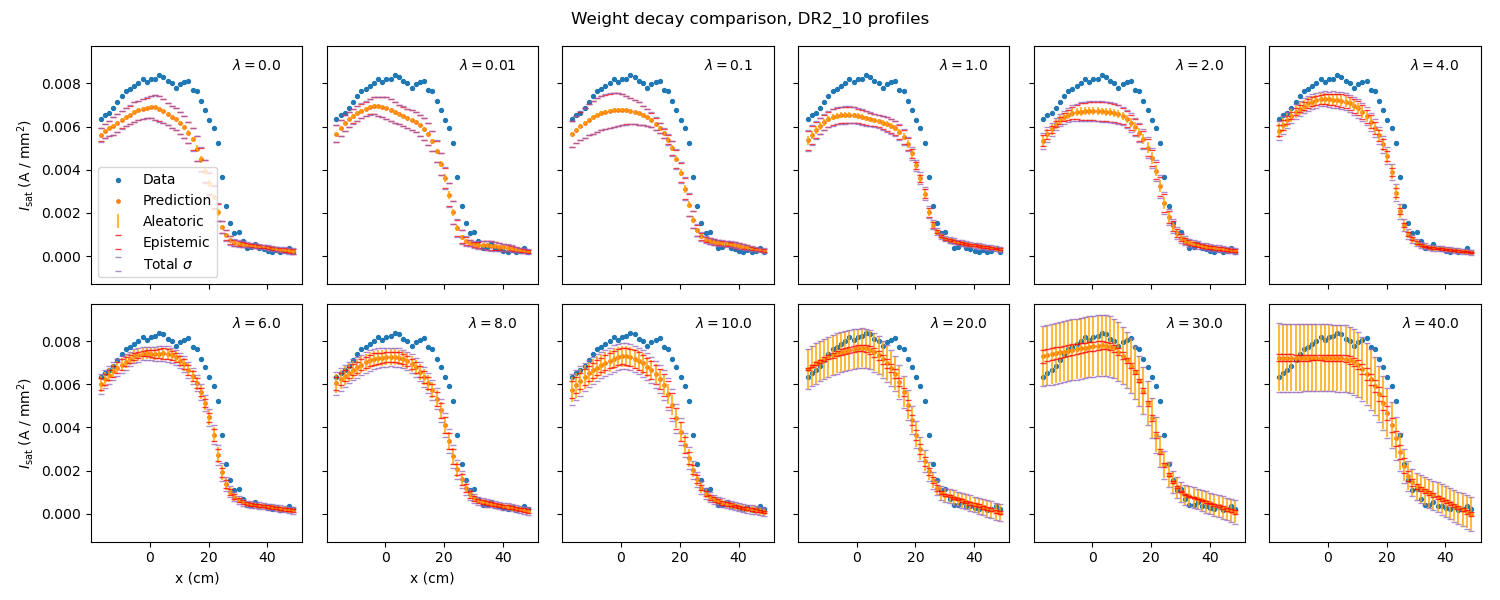

In [27]:
# ens = 'wd-scan-0.01_big'
# ens = ens_names[3]
dr = 'DR2_10'
# dr = 'DR1_20'

idx = dr_idx_all[dr][0:282:6]

fig, axes = plt.subplots(2, 6, figsize=(15,6), dpi=100, sharex=True, sharey=True)

plt.suptitle('Weight decay comparison, ' + dr + ' profiles')

i = 0
for row in axes:
    for ax in row:
#         ax.set_title(dr + ', $\lambda=${}'.format(wd[i]))
        
        ax.text(0.9, 0.9, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='right')
        
        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], all_npz['y'][idx] * all_npz['y_ptp'] + all_npz['y_mean'], s=8, label='Data')

        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                    mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                    label='Prediction', s=6, color='tab:orange')
        
#         for k in range(len(model_paths[i])):
#             ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], prediction_all[ens_names[i]][k, idx, 0] * all_npz['y_ptp'] + all_npz['y_mean'],
#                        color='tab:green', alpha=0.5, s=8)

        ax.errorbar(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                     np.sqrt(aleatoric[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='orange', alpha=0.75, label='Aleatoric')

        ax.errorbar(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                     np.sqrt(epistemic[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='red', alpha=0.75, elinewidth=0,  capsize=2, label='Epistemic')

        ax.errorbar(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                     np.sqrt(var_pred[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='tab:purple', alpha=0.75, elinewidth=0,  capsize=2, label='Total $\sigma$')
        i = i +1

        if i >= len(ens_names):
            break
        
axes[1, 0].set_xlabel('x (cm)')
axes[1, 1].set_xlabel('x (cm)')
axes[0, 0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')
axes[1, 0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')

# axes[0, 0].set_ylim(-0.0013, 0.015)

axes[0,0].legend(ncols=1)
plt.tight_layout()
# plt.savefig('plots/beta-NLL_wd-scan/' + 'big-model-ens_' + dr + '_wd-comparison_with_0.pdf')

<IPython.core.display.Javascript object>


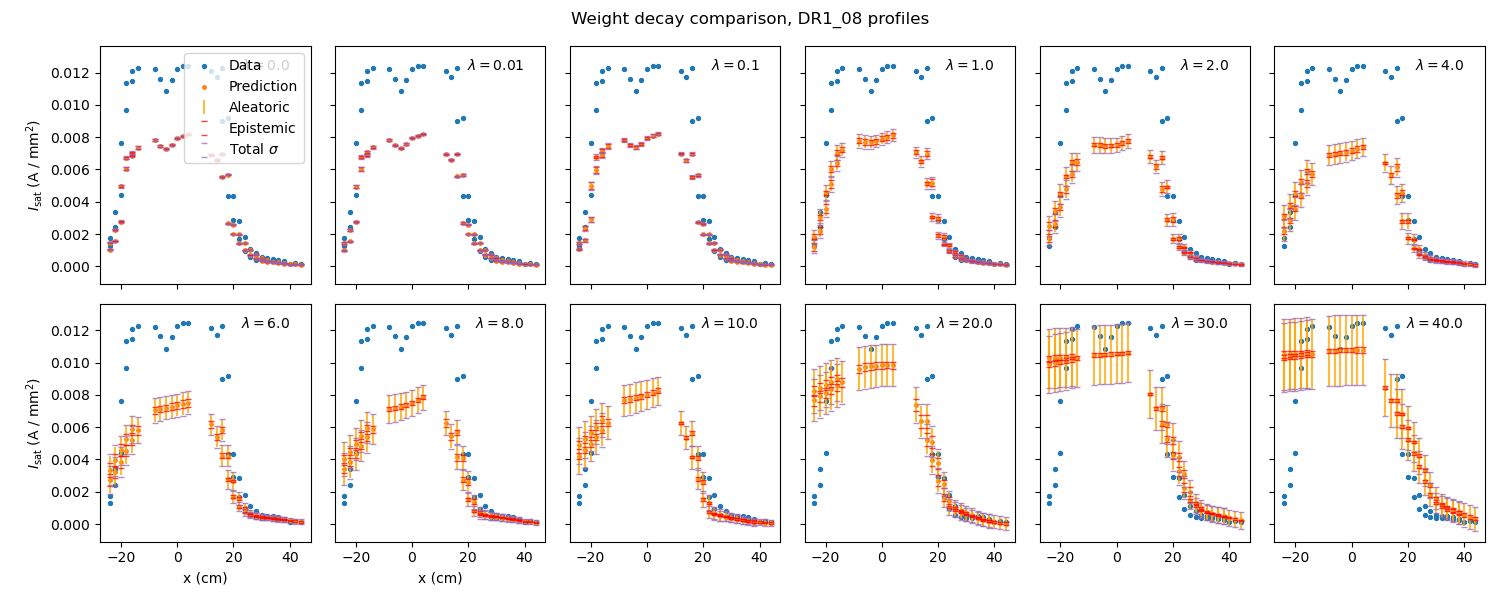

<IPython.core.display.Javascript object>


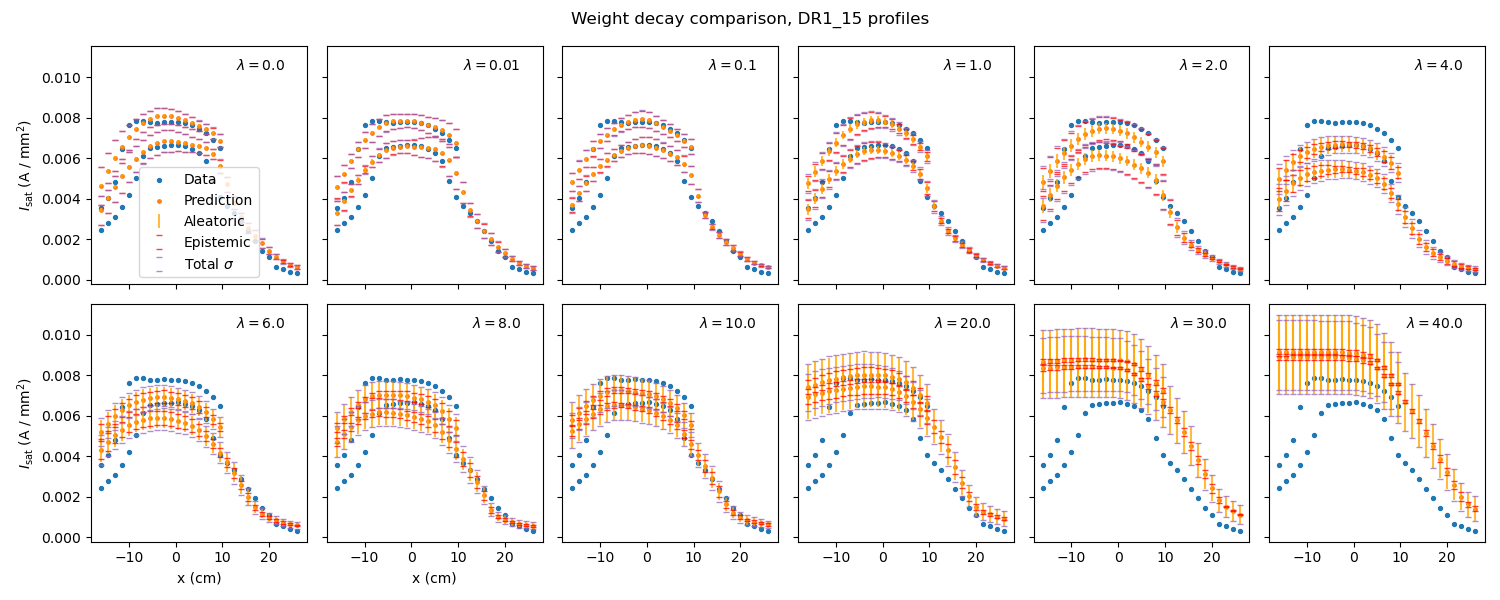

<IPython.core.display.Javascript object>


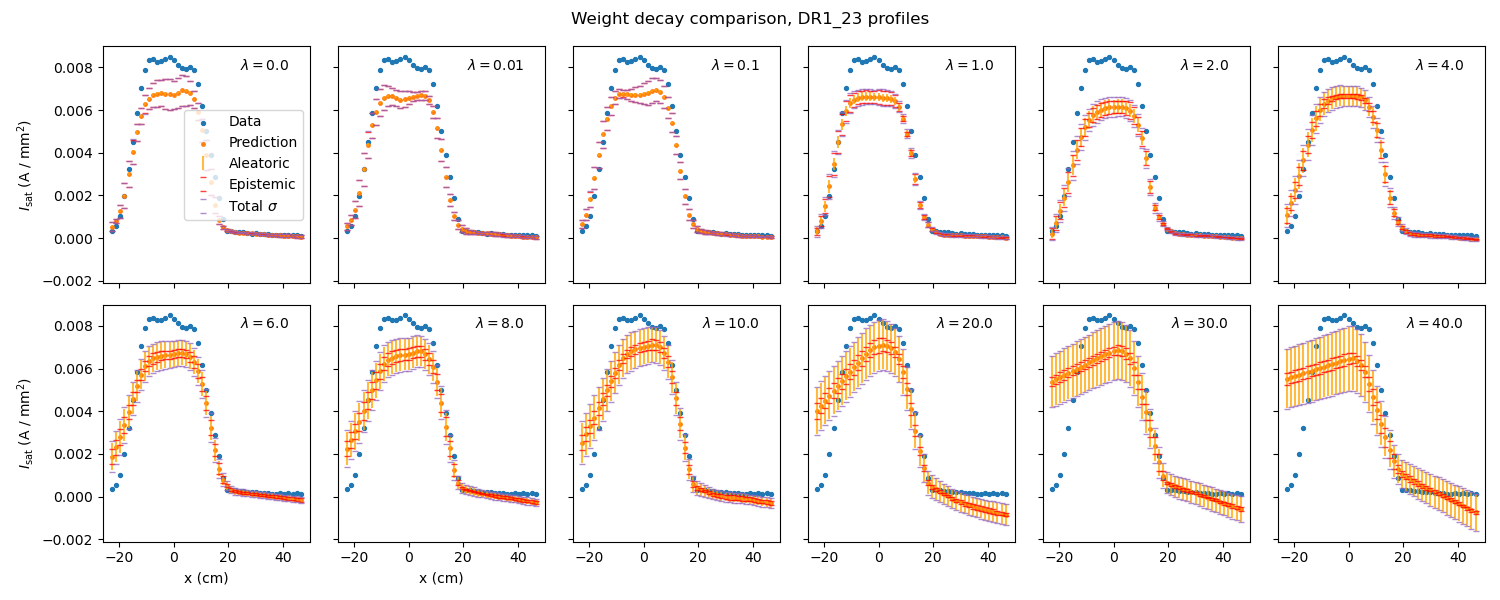

<IPython.core.display.Javascript object>


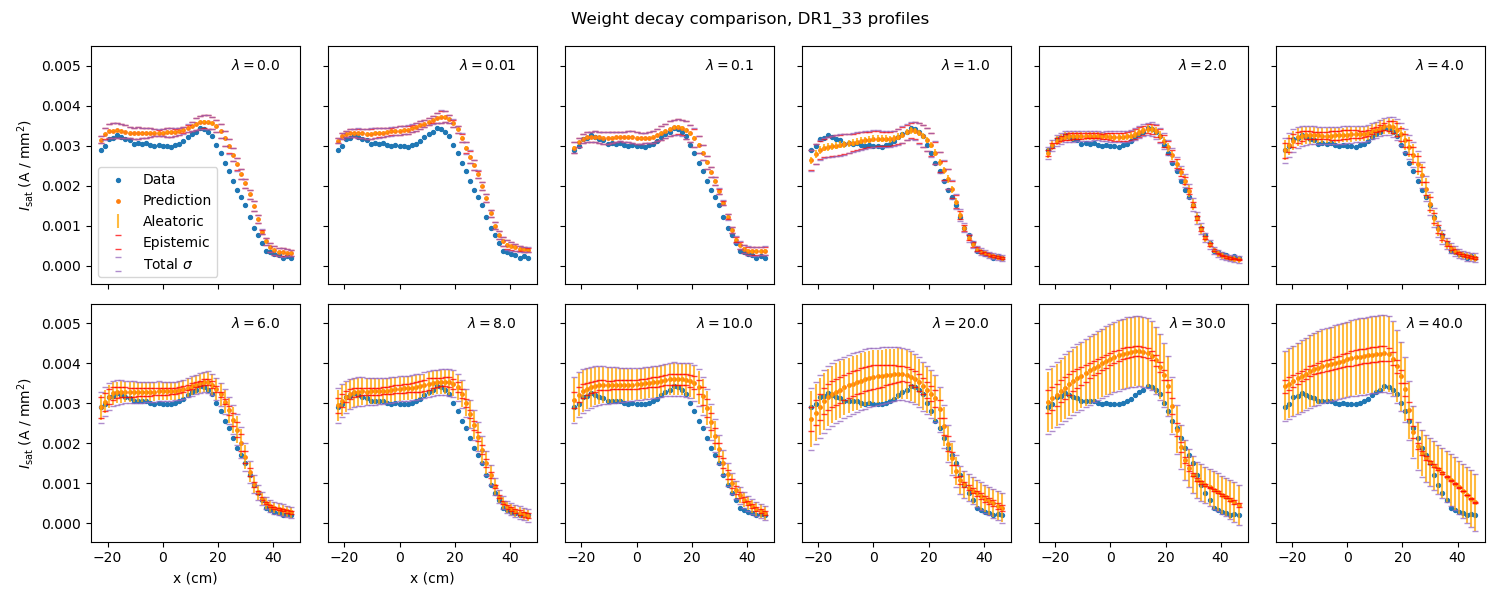

<IPython.core.display.Javascript object>


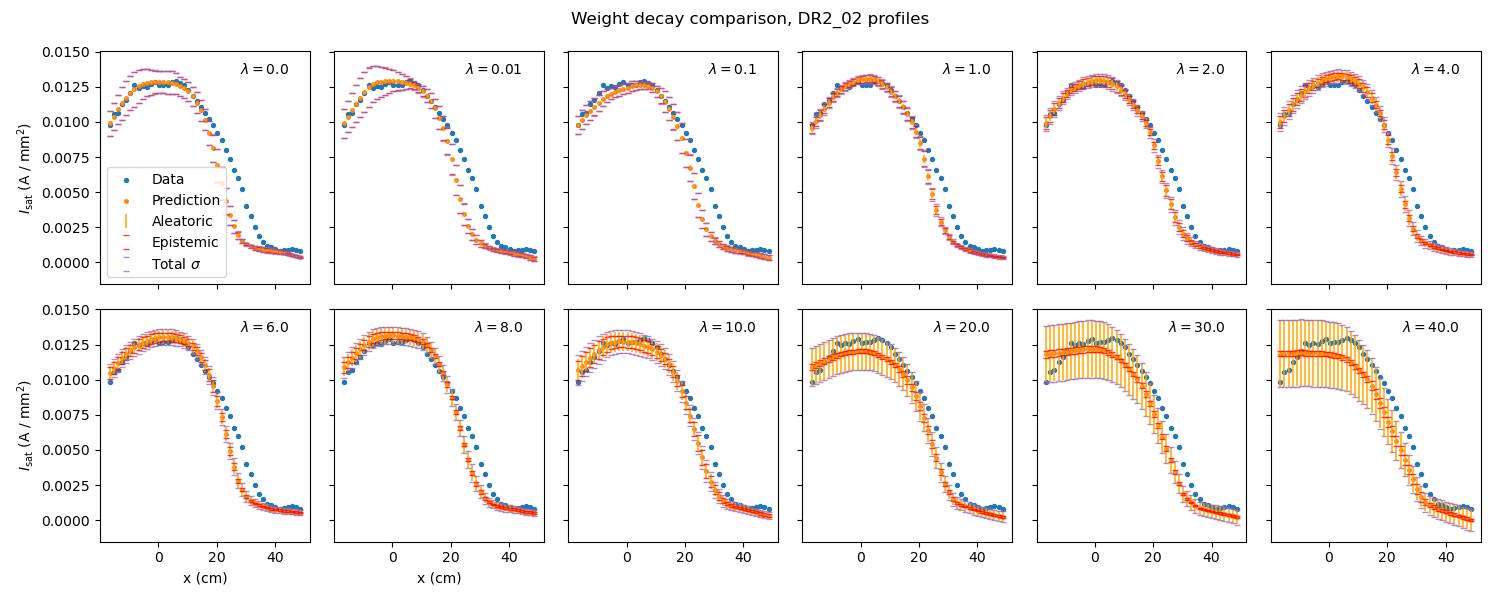

<IPython.core.display.Javascript object>


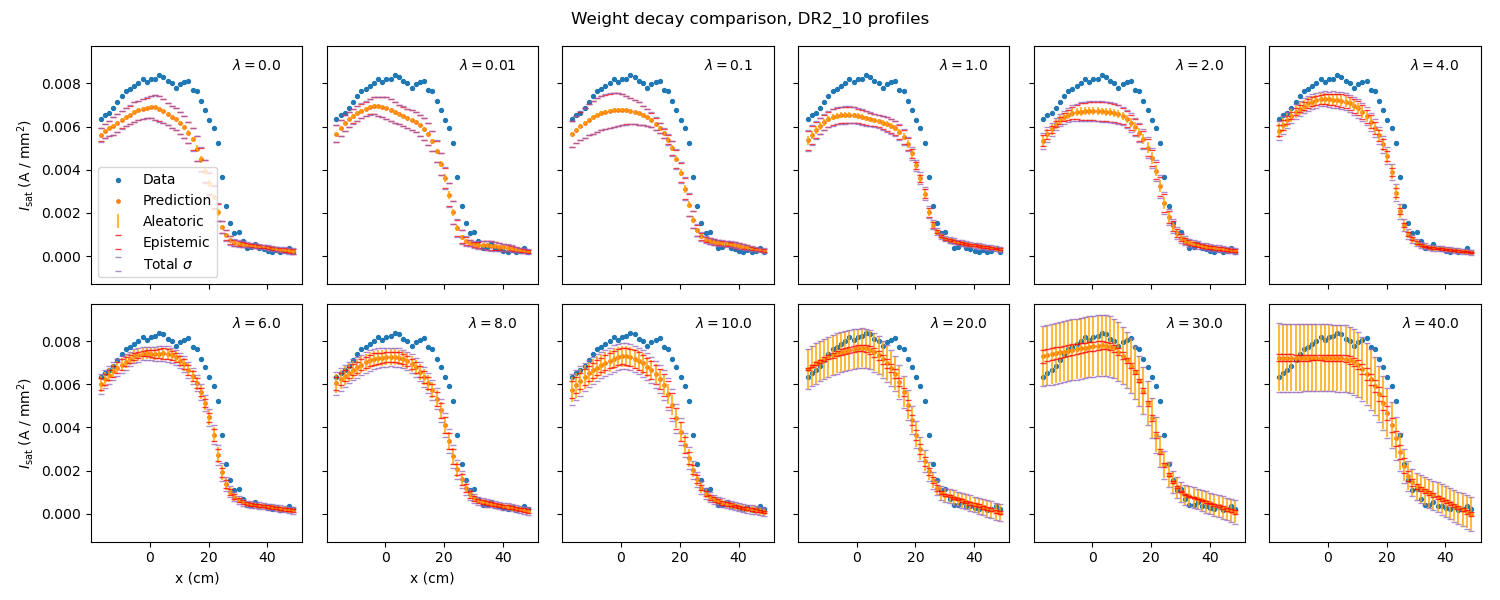

/tmp/ipykernel_646352/296778979.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(2, 6, figsize=(15,6), dpi=100, sharex=True, sharey=True)


<IPython.core.display.Javascript object>


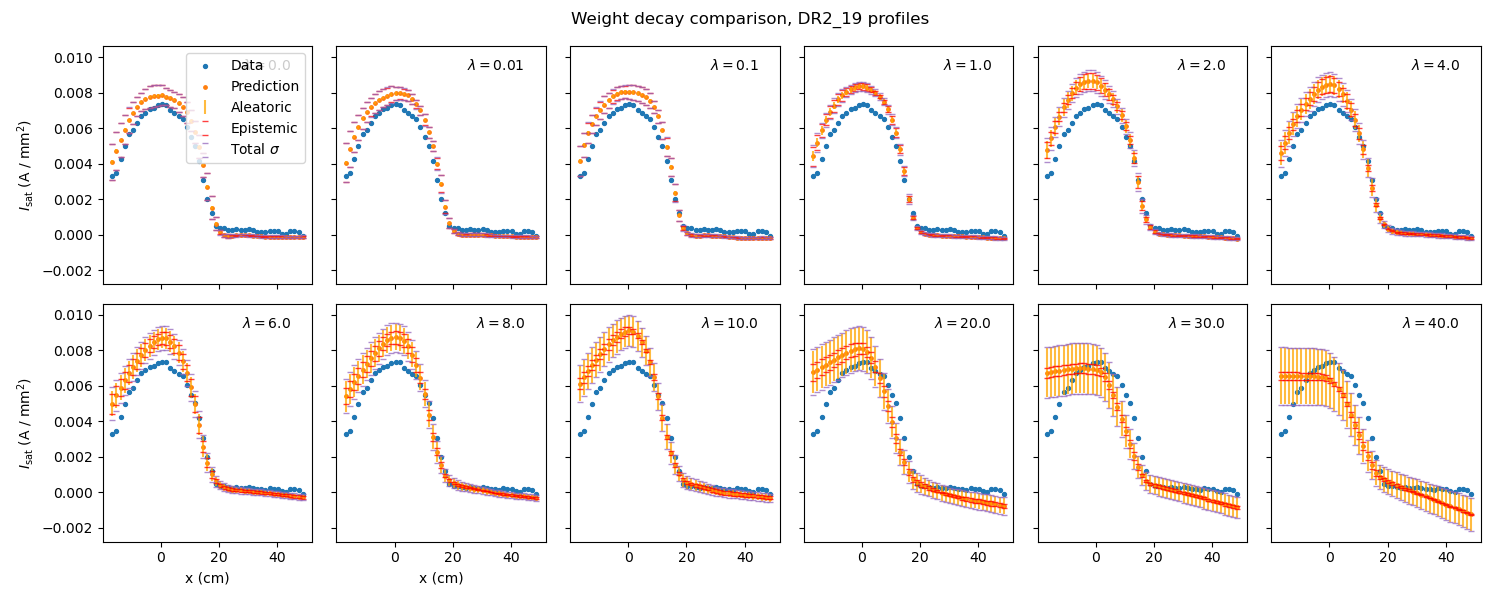

<IPython.core.display.Javascript object>


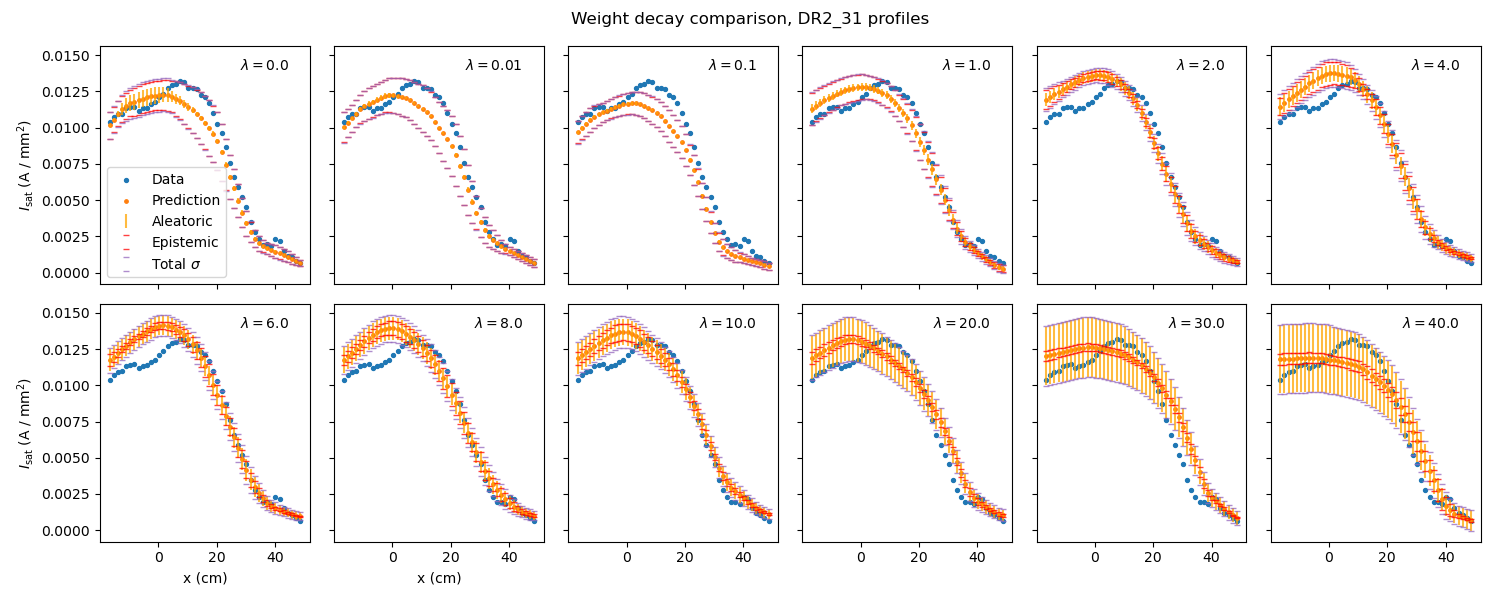

In [28]:
for dr in valid_dr:

    idx = dr_idx_all[dr][0:282:6]

    fig, axes = plt.subplots(2, 6, figsize=(15,6), dpi=100, sharex=True, sharey=True)

    plt.suptitle('Weight decay comparison, ' + dr + ' profiles')

    i = 0
    for row in axes:
        for ax in row:
    #         ax.set_title(dr + ', $\lambda=${}'.format(wd[i]))

            ax.text(0.9, 0.9, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='right')

            ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], all_npz['y'][idx] * all_npz['y_ptp'] + all_npz['y_mean'], s=8, label='Data')

            ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                        mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                        label='Prediction', s=6, color='tab:orange')

#             for k in range(len(model_paths[i])):
#                 ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], prediction_all[ens_names[i]][k, idx, 0] * all_npz['y_ptp'] + all_npz['y_mean'],
#                            color='tab:green', alpha=0.5, s=8)

            ax.errorbar(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                         mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                         np.sqrt(aleatoric[ens_names[i]][idx]) * all_npz['y_ptp'],
                         linestyle='', color='orange', alpha=0.75, label='Aleatoric')

            ax.errorbar(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                         mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                         np.sqrt(epistemic[ens_names[i]][idx]) * all_npz['y_ptp'],
                         linestyle='', color='red', alpha=0.75, elinewidth=0,  capsize=2, label='Epistemic')

            ax.errorbar(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                         mean_pred[ens_names[i]][idx] * all_npz['y_ptp'] + all_npz['y_mean'],
                         np.sqrt(var_pred[ens_names[i]][idx]) * all_npz['y_ptp'],
                         linestyle='', color='tab:purple', alpha=0.75, elinewidth=0,  capsize=2, label='Total $\sigma$')
            i = i +1

            if i >= len(ens_names):
                break
            
    axes[1, 0].set_xlabel('x (cm)')
    axes[1, 1].set_xlabel('x (cm)')
    axes[0, 0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')
    axes[1, 0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')

    # axes[0, 0].set_ylim(-0.0013, 0.015)

    plt.tight_layout()
    axes[0,0].legend(ncols=1)
#     plt.savefig('plots/beta-NLL_wd-scan/' + dr + '_wd-comparison.pdf')

# Variance profiles

<IPython.core.display.Javascript object>


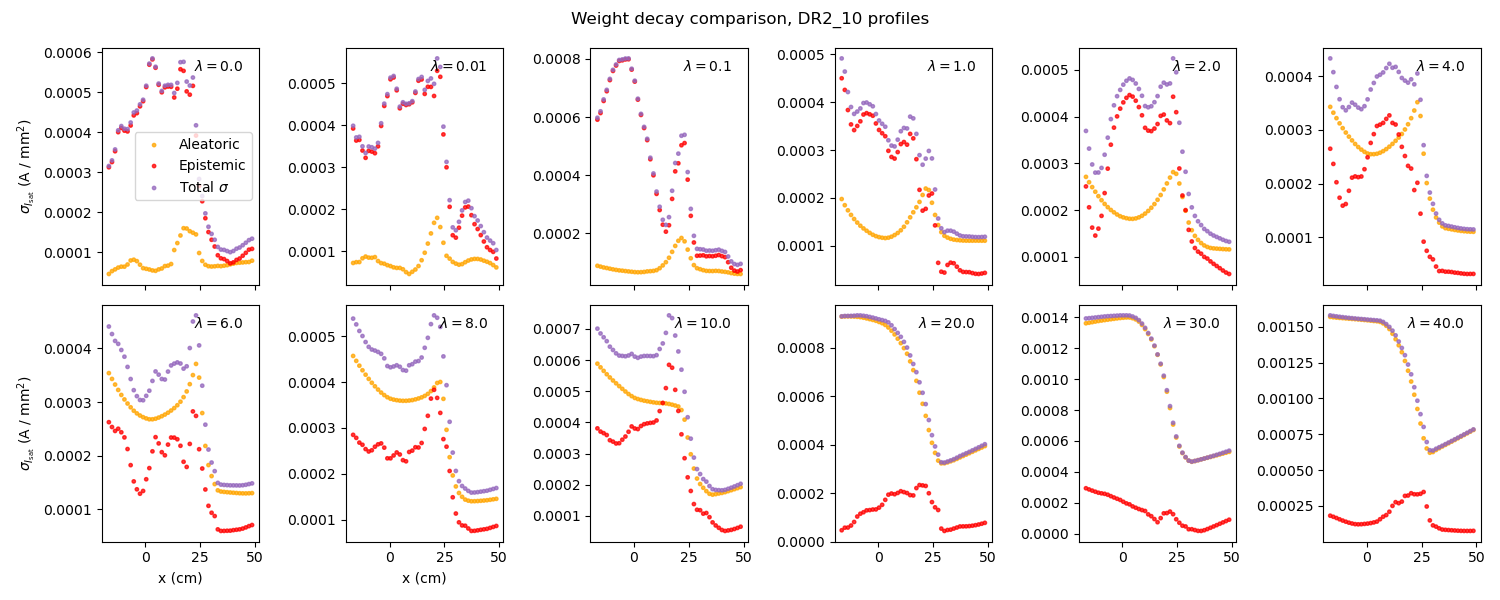

In [29]:
dr = 'DR2_10'
idx = dr_idx_all[dr][0:282:6]

fig, axes = plt.subplots(2, 6, figsize=(15,6), dpi=100, sharex=True, sharey=False)
plt.suptitle('Weight decay comparison, ' + dr + ' profiles')

i = 0
for row in axes:
    for ax in row:
#         ax.set_title(dr + ', $\lambda=${}'.format(wd[i]))
        ax.text(0.9, 0.9, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='right')

        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(aleatoric[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='orange', alpha=0.75, s=6, label='Aleatoric')

        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(epistemic[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='red', alpha=0.75, s=6, label='Epistemic')

        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(var_pred[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='tab:purple', alpha=0.75, s=6, label='Total $\sigma$')
        i = i +1
        
        if i >= len(ens_names):
            break
        
axes[1, 0].set_xlabel('x (cm)')
axes[1, 1].set_xlabel('x (cm)')
axes[0, 0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')
axes[1, 0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')

# axes[0, 0].set_ylim(-0.0013, 0.015)

plt.tight_layout()
axes[0,0].legend(ncols=1)
# plt.savefig('plots/beta-NLL_wd-scan/' + 'ens_' + dr + '_wd-comparison_with_0.pdf')

In [30]:
valid_dr

['DR1_08',
 'DR1_15',
 'DR1_23',
 'DR1_33',
 'DR2_02',
 'DR2_10',
 'DR2_19',
 'DR2_31']

<IPython.core.display.Javascript object>


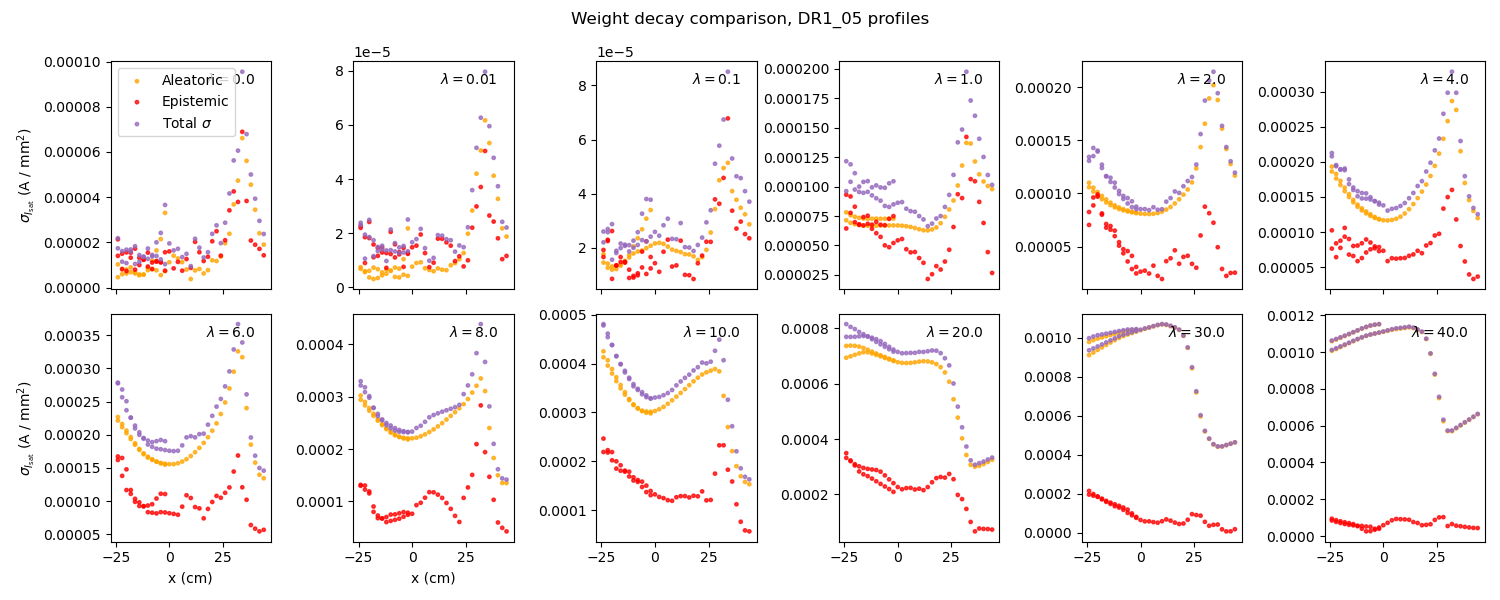

In [31]:
dr = 'DR1_05'
idx = dr_idx_all[dr][0:282:6]

fig, axes = plt.subplots(2, 6, figsize=(15,6), dpi=100, sharex=True, sharey=False)
plt.suptitle('Weight decay comparison, ' + dr + ' profiles')

i = 0
for row in axes:
    for ax in row:
#         ax.set_title(dr + ', $\lambda=${}'.format(wd[i]))
        ax.text(0.9, 0.9, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='right')

        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(aleatoric[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='orange', alpha=0.75, s=6, label='Aleatoric')

        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(epistemic[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='red', alpha=0.75, s=6, label='Epistemic')

        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(var_pred[ens_names[i]][idx]) * all_npz['y_ptp'],
                     linestyle='', color='tab:purple', alpha=0.75, s=6, label='Total $\sigma$')
        i = i +1
        if i >= len(ens_names):
            break
axes[1, 0].set_xlabel('x (cm)')
axes[1, 1].set_xlabel('x (cm)')
axes[0, 0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')
axes[1, 0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')

# axes[0, 0].set_ylim(-0.0013, 0.015)

axes[0,0].legend(ncols=1)

plt.tight_layout()
# plt.savefig('plots/beta-NLL_wd-scan/' + 'ens_' + dr + '_wd-comparison.pdf')

## Predicting beyond data bounds

In [32]:
valid_dr

['DR1_08',
 'DR1_15',
 'DR1_23',
 'DR1_33',
 'DR2_02',
 'DR2_10',
 'DR2_19',
 'DR2_31']

In [33]:
dr = 'DR2_10'

x_extrapolate_train = all_npz['x'][dr_idx_all[dr][0]]
x_extrapolate_train = np.tile(x_extrapolate_train, (141, 1))
x_extrapolate_train[:, 6] = (np.arange(-70, 71) - x_mean[6]) / x_ptp[6]

In [34]:
extrapolate_train = {}
for key in tqdm(all_models.keys()):
    models = all_models[key]
#     for model in all_models[key]:
#         model = model.cpu()
    extra_train_temp = []
    for model in models:
        extra_train_temp.append(model(torch.tensor(x_extrapolate_train, dtype=torch.float32, device='cuda')).cpu().detach().numpy().astype(np.float64))
        model = None
        torch.cuda.empty_cache()

    extrapolate_train[key] = np.array(extra_train_temp)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 605.49it/s]


<IPython.core.display.Javascript object>


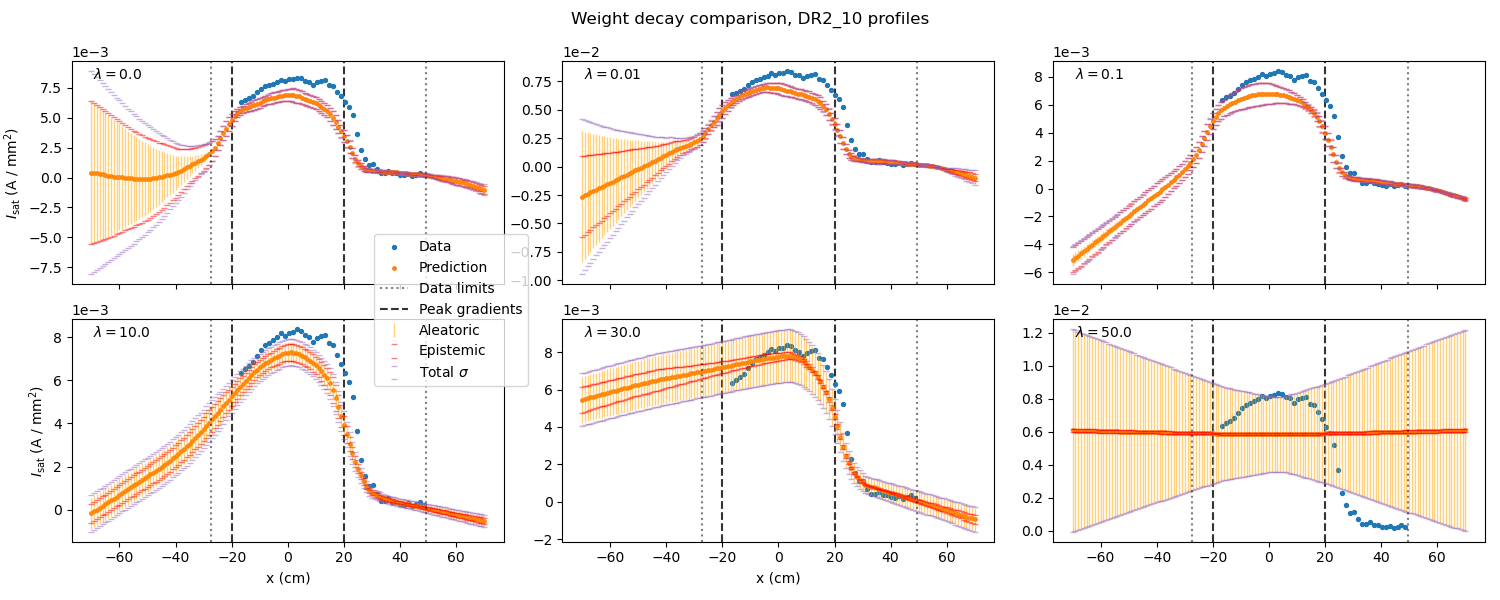

In [42]:
# ens = 'wd-scan-0.01_big'
# ens = ens_names[3]
dr = 'DR2_10'

idx = dr_idx_all[dr][0:282:6]

fig, axes = plt.subplots(2, 3, figsize=(15,6), dpi=100, sharex=True, sharey=False)

plt.suptitle('Weight decay comparison, ' + dr + ' profiles')

plot_idx_list = [0, 1, 2, 8, 10, 12]

k = 0
for row in axes:
    for ax in row:
        i = plot_idx_list[k]
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         ax.set_title(dr + ', $\lambda=${}'.format(wd[i]))
        extra_mean_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 0], axis=0)
        extra_var_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 1] + extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2
        extra_aleatoric = np.mean(extrapolate_train[ens_names[i]][:, :, 1], axis=0)
        extra_epistemic = np.mean(extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2
        
        ax.text(0.05, 0.92, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='left')
        
        ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], all_npz['y'][idx] * all_npz['y_ptp'] + all_npz['y_mean'], s=8, label='Data')

        ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                    extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                    label='Prediction', s=6, color='tab:orange')
        
#         for k in range(len(model_paths[i])):
#             ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], prediction_all[ens_names[i]][k, idx, 0] * all_npz['y_ptp'] + all_npz['y_mean'],
#                        color='tab:green', alpha=0.5, s=8)

        ax.errorbar(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                     np.sqrt(extra_aleatoric) * all_npz['y_ptp'], lw=0, elinewidth=1,
                     color='orange', alpha=0.5, label='Aleatoric')

        ax.errorbar(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                     np.sqrt(extra_epistemic) * all_npz['y_ptp'],
                     color='red', alpha=0.5, elinewidth=0,  capsize=2, lw=0, label='Epistemic')

        ax.errorbar(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                     np.sqrt(extra_var_pred) * all_npz['y_ptp'],
                     color='tab:purple', alpha=0.5, elinewidth=0, lw=0, capsize=2, label='Total $\sigma$')
        
        ax.axvline(-27.27, linestyle='dotted', color='black', alpha=0.5, label='Data limits')
        ax.axvline(49.39, linestyle='dotted', color='black', alpha=0.5)
        ax.axvline(20, linestyle='dashed', color='black', alpha=0.8, zorder=0, label='Peak gradients')
        ax.axvline(-20, linestyle='dashed', color='black', alpha=0.8, zorder=0)
    
        k = k + 1
        if k >= len(plot_idx_list):
            break
axes[1, 0].set_xlabel('x (cm)')
axes[1, 1].set_xlabel('x (cm)')
axes[0, 0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')
axes[1, 0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')

# axes[0, 0].set_ylim(-0.0013, 0.015)

plt.tight_layout()
axes[1,0].legend(ncols=1, loc=(0.7, 0.7))
# plt.savefig('plots/beta-NLL_wd-scan/' + 'extrapolation-profile_' + dr + '_wd-comparison_select.pdf')

<IPython.core.display.Javascript object>


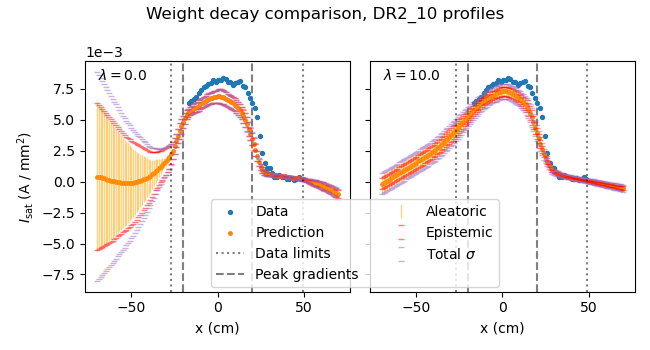

In [73]:
dr = 'DR2_10'

idx = dr_idx_all[dr][0:282:6]

fig, axes = plt.subplots(1, 2, figsize=(6.5,3.5), dpi=100, sharex=True, sharey=True)

plt.suptitle('Weight decay comparison, ' + dr + ' profiles')

plot_idx_list = [0, 8]

k = 0
for ax in axes:
    i = plot_idx_list[k]
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    extra_mean_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 0], axis=0)
    extra_var_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 1] + extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2
    extra_aleatoric = np.mean(extrapolate_train[ens_names[i]][:, :, 1], axis=0)
    extra_epistemic = np.mean(extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2

    ax.text(0.05, 0.92, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='left')

    ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], all_npz['y'][idx] * all_npz['y_ptp'] + all_npz['y_mean'], s=8, label='Data')

    ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                label='Prediction', s=6, color='tab:orange')

    ax.errorbar(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                 extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                 np.sqrt(extra_aleatoric) * all_npz['y_ptp'], lw=0, elinewidth=1,
                 color='orange', alpha=0.5, label='Aleatoric')

    ax.errorbar(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                 extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                 np.sqrt(extra_epistemic) * all_npz['y_ptp'],
                 color='red', alpha=0.5, elinewidth=0,  capsize=2, lw=0, label='Epistemic')

    ax.errorbar(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                 extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
                 np.sqrt(extra_var_pred) * all_npz['y_ptp'],
                 color='tab:purple', alpha=0.5, elinewidth=0, lw=0, capsize=2, label='Total $\sigma$')

    ax.axvline(-27.27, linestyle='dotted', color='black', alpha=0.5, label='Data limits')
    ax.axvline(49.39, linestyle='dotted', color='black', alpha=0.5)
    ax.axvline(20, linestyle='dashed', color='black', alpha=0.5, zorder=0, label='Peak gradients')
    ax.axvline(-20, linestyle='dashed', color='black', alpha=0.5, zorder=0)

    k = k + 1
    if k >= len(plot_idx_list):
        break
axes[0].set_xlabel('x (cm)')
axes[1].set_xlabel('x (cm)')
axes[0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')
axes[0].set_ylabel('$I_\mathrm{sat}$ (A / mm$^2$)')

# axes[0, 0].set_ylim(-0.0013, 0.015)

plt.tight_layout()
axes[1].legend(ncols=2, loc=(-0.6, 0.02))
# plt.savefig('plots/beta-NLL_wd-scan/' + 'extrapolation-profile_' + dr + '_wd-comparison_two.pdf')

<IPython.core.display.Javascript object>


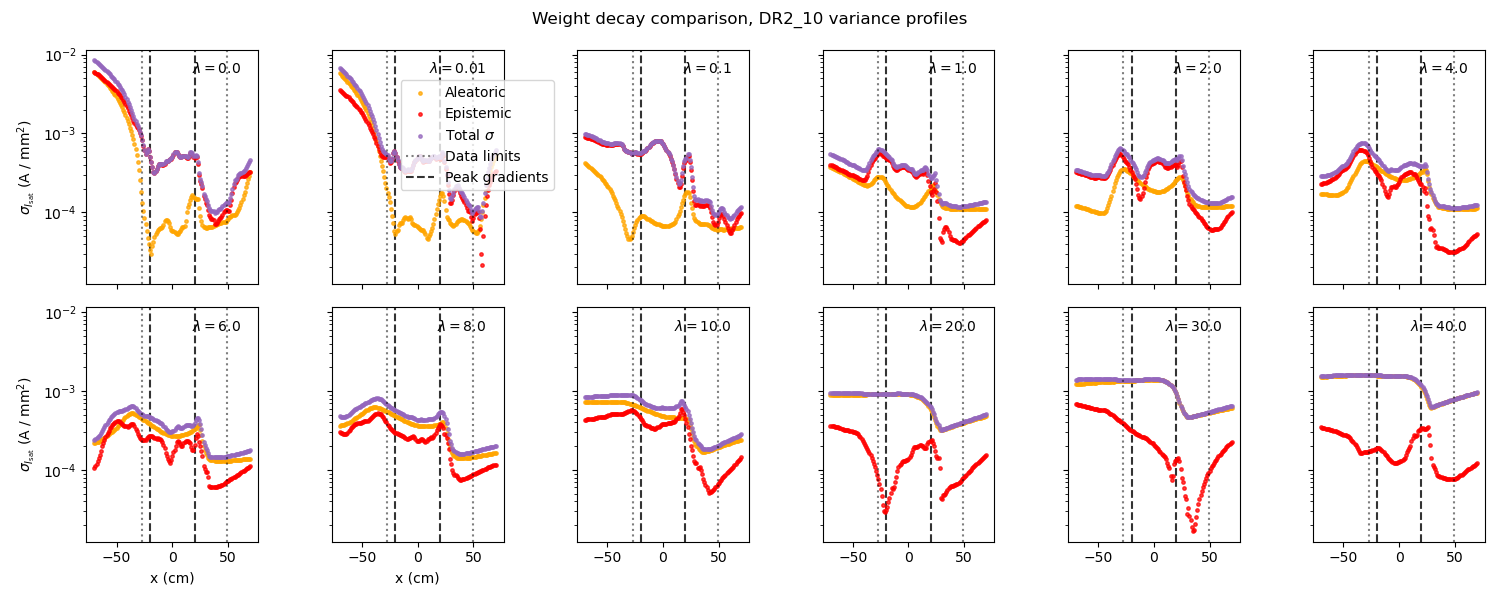

In [36]:
idx = dr_idx_all[dr][0:282]

fig, axes = plt.subplots(2, 6, figsize=(15,6), sharex=True, sharey=True)

plt.suptitle('Weight decay comparison, ' + dr + ' variance profiles')

i = 0
for row in axes:
    for ax in row:
        extra_mean_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 0], axis=0)
        extra_var_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 1] + extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2
        extra_aleatoric = np.mean(extrapolate_train[ens_names[i]][:, :, 1], axis=0)
        extra_epistemic = np.mean(extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2
        
        ax.text(0.9, 0.9, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='right')
        
#         ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], all_npz['y'][idx] * all_npz['y_ptp'] + all_npz['y_mean'], s=8, label='Data')

#         ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
#                     extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
#                     label='Prediction', s=6, color='tab:orange')
        
#         for k in range(len(model_paths[i])):
#             ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], prediction_all[ens_names[i]][k, idx, 0] * all_npz['y_ptp'] + all_npz['y_mean'],
#                        color='tab:green', alpha=0.5, s=8)

        ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(extra_aleatoric) * all_npz['y_ptp'],
                     color='orange', alpha=0.75, s=6, label='Aleatoric')

        ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(extra_epistemic) * all_npz['y_ptp'],
                     color='red', alpha=0.75, s=6, label='Epistemic')

        ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                     np.sqrt(extra_var_pred) * all_npz['y_ptp'],
                     color='tab:purple', alpha=0.75, s=6, label=r'Total $\sigma$')

        ax.axvline(-27.27, linestyle='dotted', color='black', alpha=0.5, label='Data limits')
        ax.axvline(49.39, linestyle='dotted', color='black', alpha=0.5)
        ax.axvline(20, linestyle='dashed', color='black', alpha=0.8, zorder=0, label='Peak gradients')
        ax.axvline(-20, linestyle='dashed', color='black', alpha=0.8, zorder=0)
        ax.set_yscale('log')
        i = i +1
        if i >= len(ens_names):
            break
axes[1, 0].set_xlabel('x (cm)')
axes[1, 1].set_xlabel('x (cm)')
axes[0, 0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')
axes[1, 0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')
axes[0,1].legend(ncols=1, loc=(0.4, 0.4))
# axes[0, 0].set_ylim(-0.0013, 0.015)

plt.tight_layout()

# plt.savefig('plots/beta-NLL_wd-scan/' + 'extrapolation-variance_' + dr + '_wd-comparison_with_0.pdf')

<IPython.core.display.Javascript object>


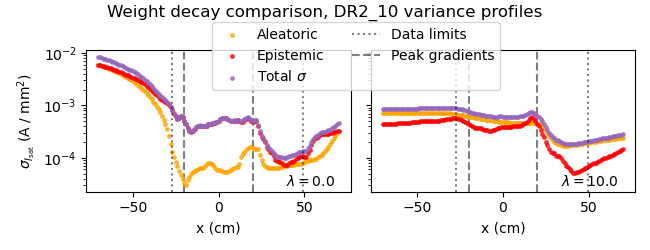

In [74]:
idx = dr_idx_all[dr][0:282]

fig, axes = plt.subplots(1, 2, figsize=(6.5,2.5), sharex=True, sharey=True)

plt.suptitle('Weight decay comparison, ' + dr + ' variance profiles')

plot_idx_list = [0, 8]

k = 0
for ax in axes:
    i = plot_idx_list[k]
    extra_mean_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 0], axis=0)
    extra_var_pred = np.mean(extrapolate_train[ens_names[i]][:, :, 1] + extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2
    extra_aleatoric = np.mean(extrapolate_train[ens_names[i]][:, :, 1], axis=0)
    extra_epistemic = np.mean(extrapolate_train[ens_names[i]][:, :, 0] ** 2, axis=0) - extra_mean_pred ** 2

    ax.text(0.94, 0.04, '$\lambda=${}'.format(wd[i]), transform=ax.transAxes, horizontalalignment='right')

#         ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], all_npz['y'][idx] * all_npz['y_ptp'] + all_npz['y_mean'], s=8, label='Data')

#         ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
#                     extra_mean_pred * all_npz['y_ptp'] + all_npz['y_mean'],
#                     label='Prediction', s=6, color='tab:orange')

#         for k in range(len(model_paths[i])):
#             ax.scatter(all_npz['x'][idx, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6], prediction_all[ens_names[i]][k, idx, 0] * all_npz['y_ptp'] + all_npz['y_mean'],
#                        color='tab:green', alpha=0.5, s=8)

    ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                 np.sqrt(extra_aleatoric) * all_npz['y_ptp'],
                 color='orange', alpha=0.75, s=6, label='Aleatoric')

    ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                 np.sqrt(extra_epistemic) * all_npz['y_ptp'],
                 color='red', alpha=0.75, s=6, label='Epistemic')

    ax.scatter(x_extrapolate_train[:, 6] * all_npz['x_ptp'][6] + all_npz['x_mean'][6],
                 np.sqrt(extra_var_pred) * all_npz['y_ptp'],
                 color='tab:purple', alpha=0.75, s=6, label=r'Total $\sigma$')

    ax.axvline(-27.27, linestyle='dotted', color='black', alpha=0.5, label='Data limits')
    ax.axvline(49.39, linestyle='dotted', color='black', alpha=0.5)
    ax.axvline(20, linestyle='dashed', color='black', alpha=0.5, zorder=0, label='Peak gradients')
    ax.axvline(-20, linestyle='dashed', color='black', alpha=0.5, zorder=0)
    ax.set_yscale('log')
    k = k + 1
    if k >= len(plot_idx_list):
        break
axes[0].set_xlabel('x (cm)')
axes[1].set_xlabel('x (cm)')
axes[0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')
axes[0].set_ylabel('$\sigma_{I_\mathrm{sat}}$ (A / mm$^2$)')
# axes[0, 0].set_ylim(-0.0013, 0.015)

plt.tight_layout()
axes[1].legend(ncols=2, loc=(-0.6, 0.72))

# plt.savefig('plots/beta-NLL_wd-scan/' + 'extrapolation-variance_' + dr + '_wd-comparison_two.pdf')

# z-score

In [393]:
zscore = {}
zscore_train = {}
zscore_train_aleatoric = {}
zscore_train_epistemic = {}
zscore_valid = {}
zscore_valid_aleatoric = {}
zscore_valid_epistemic = {}

for ens in ens_names:
    print('===========' + ens + '===========')
    zscore[ens] = (mean_pred[ens] - all_npz['y']) / np.sqrt(var_pred[ens])
    zscore_train[ens] = (mean_pred_train[ens] - train_npz['y']) / np.sqrt(var_pred_train[ens])
    zscore_valid[ens] = (mean_pred_valid[ens] - valid_npz['y']) / np.sqrt(var_pred_valid[ens])
    
    zscore_train_aleatoric[ens] = (mean_pred_train[ens] - train_npz['y']) / np.sqrt(aleatoric_train[ens])
    zscore_train_epistemic[ens] = (mean_pred_train[ens] - train_npz['y']) / np.sqrt(epistemic_train[ens])
    
    zscore_valid_aleatoric[ens] = (mean_pred_valid[ens] - valid_npz['y']) / np.sqrt(aleatoric_valid[ens])
    zscore_valid_epistemic[ens] = (mean_pred_valid[ens] - valid_npz['y']) / np.sqrt(epistemic_valid[ens])
    
    
    print('   Train')
    for i in range(1,4):
        print('\t', end='')
        print(len(np.where(np.abs(zscore_train[ens]) <= i)[0]) / len(zscore_train[ens]))
    print('   Valid')
    for i in range(1,4):
        print('\t', end='')
        print(len(np.where(np.abs(zscore_valid[ens]) <= i)[0]) / len(zscore_valid[ens]))

===========beta-NLL_wd-0.0===========
   Train
	0.7867367583445497
	0.9793280341315996
	0.998179986625018
   Valid
	0.30665474327446157
	0.5200089425441539
	0.706162903346002
===========beta-NLL_wd-0.01===========
   Train
	0.741693543608367
	0.9667233833625382
	0.9961737393232937
   Valid
	0.3190252626872345
	0.5359564796184515
	0.707429763767792
===========beta-NLL_wd-0.1===========
   Train
	0.7997646680380256
	0.9832558769501655
	0.9991704125081478
   Valid
	0.2633579253297563
	0.48654892316864146
	0.6568298680974737
===========beta-NLL_wd-1.0===========
   Train
	0.836317308750455
	0.9828156876687745
	0.9981461259110649
   Valid
	0.2939116178552798
	0.5337953647812803
	0.7221849616215813
===========beta-NLL_wd-2.0===========
   Train
	0.8082467768832906
	0.974350509180486
	0.9960552268244576
   Valid
	0.23571055965422164
	0.4698561740815262
	0.6496013115731426
===========beta-NLL_wd-4.0===========
   Train
	0.805969643869941
	0.9735886431165401
	0.9950901964767928
   Valid
	0.2666

/tmp/ipykernel_381350/1126892209.py:16: RuntimeWarning: invalid value encountered in sqrt
  zscore_train_epistemic[ens] = (mean_pred_train[ens] - train_npz['y']) / np.sqrt(epistemic_train[ens])


In [394]:
for ens in ens_names:
    print('===========' + ens + '===========')
    print(np.mean((mean_pred_valid[ens] - valid_npz['y']) ** 2 ))

===========beta-NLL_wd-0.0===========
0.0018531148
===========beta-NLL_wd-0.01===========
0.001891036
===========beta-NLL_wd-0.1===========
0.0018629985
===========beta-NLL_wd-1.0===========
0.0017871676
===========beta-NLL_wd-2.0===========
0.0023610773
===========beta-NLL_wd-4.0===========
0.0027956509
===========beta-NLL_wd-6.0===========
0.0034388304
===========beta-NLL_wd-8.0===========
0.004290618
===========beta-NLL_wd-10.0===========
0.005060276
===========beta-NLL_wd-20.0===========
0.0037219918
===========beta-NLL_wd-30.0===========
0.0037610442
===========beta-NLL_wd-40.0===========
0.006067905
===========beta-NLL_wd-50.0===========
0.030977545


In [298]:
ens_names

['beta-NLL_wd-0.01',
 'beta-NLL_wd-0.1',
 'beta-NLL_wd-1.0',
 'beta-NLL_wd-2.0',
 'beta-NLL_wd-4.0',
 'beta-NLL_wd-6.0',
 'beta-NLL_wd-8.0',
 'beta-NLL_wd-10.0',
 'beta-NLL_wd-20.0',
 'beta-NLL_wd-30.0',
 'beta-NLL_wd-40.0',
 'beta-NLL_wd-50.0']

<IPython.core.display.Javascript object>


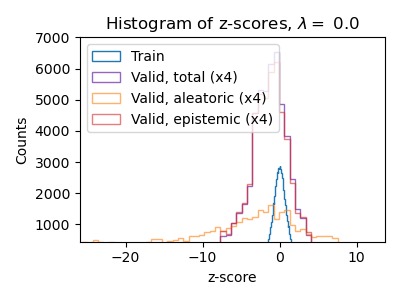

<IPython.core.display.Javascript object>


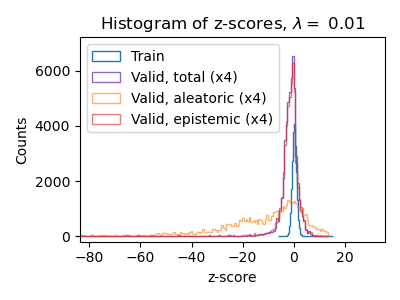

<IPython.core.display.Javascript object>


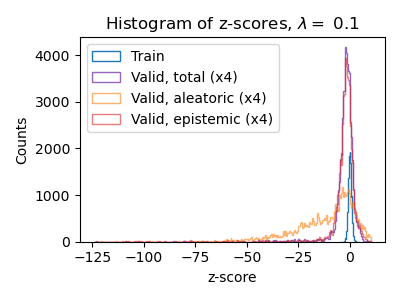

<IPython.core.display.Javascript object>


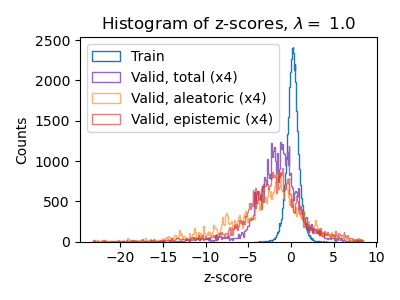

<IPython.core.display.Javascript object>


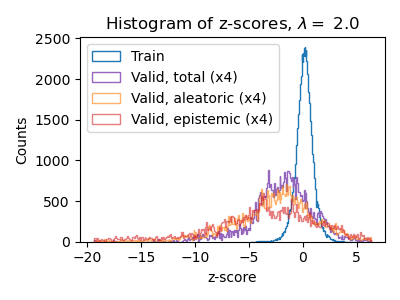

<IPython.core.display.Javascript object>


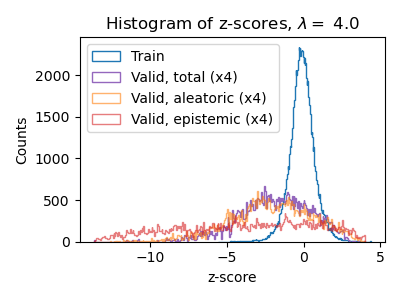

<IPython.core.display.Javascript object>


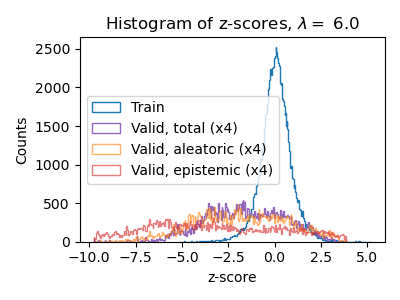

<IPython.core.display.Javascript object>


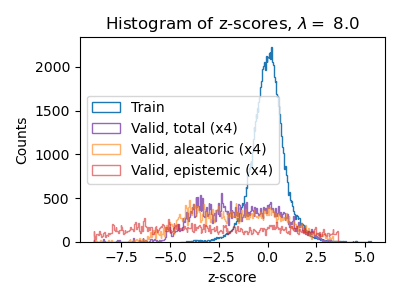

<IPython.core.display.Javascript object>


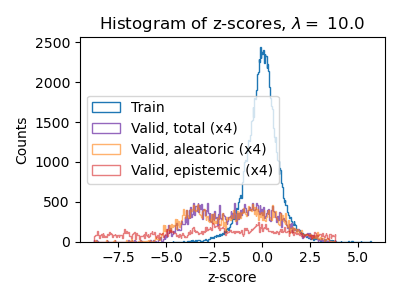

<IPython.core.display.Javascript object>


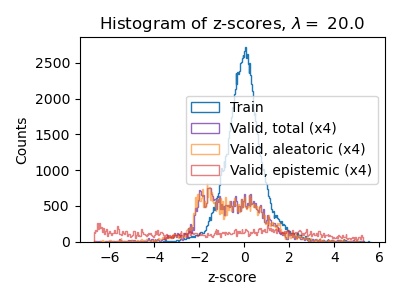

<IPython.core.display.Javascript object>


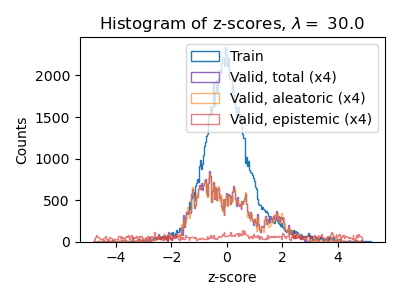

<IPython.core.display.Javascript object>


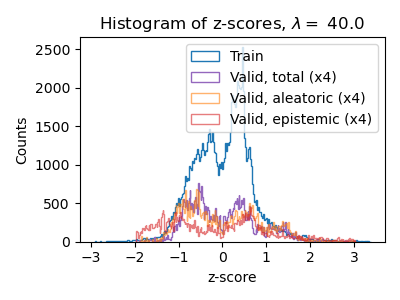

<IPython.core.display.Javascript object>


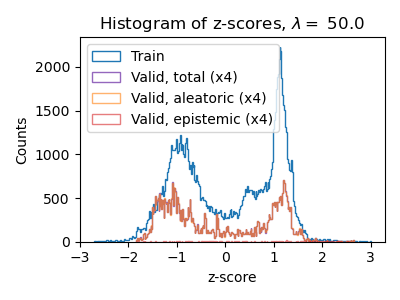

In [395]:
%matplotlib notebook

for i, ens in enumerate(ens_names[:]):
    plt.figure(figsize=(4,3))
    plt.hist(zscore_train[ens], bins=300, histtype='step', label='Train');

    zscore_counts, zscore_bins = np.histogram(zscore_valid[ens], bins=300)
    plt.hist(zscore_bins[:-1], zscore_bins, weights= 4 * zscore_counts, histtype='step', label='Valid, total (x4)', color='tab:purple');
    # plt.yscale('log')

    zscore_counts, zscore_bins = np.histogram(zscore_valid_aleatoric[ens], bins=zscore_bins)
    plt.hist(zscore_bins[:-1], zscore_bins, weights= 4 * zscore_counts, histtype='step', label='Valid, aleatoric (x4)', color='tab:orange', alpha=0.6);

    zscore_counts, zscore_bins = np.histogram(zscore_valid_epistemic[ens], bins=zscore_bins)
    plt.hist(zscore_bins[:-1], zscore_bins, weights= 4 * zscore_counts, histtype='step', label='Valid, epistemic (x4)', color='tab:red', alpha=0.6);

    
    plt.title('Histogram of z-scores, $\lambda=$ {}'.format(wd[i]))
    plt.xlabel('z-score')
    plt.ylabel('Counts')
    plt.legend()
    plt.tight_layout()
#     plt.savefig('plots/beta-NLL_wd-scan/z-score.pdf')

<IPython.core.display.Javascript object>


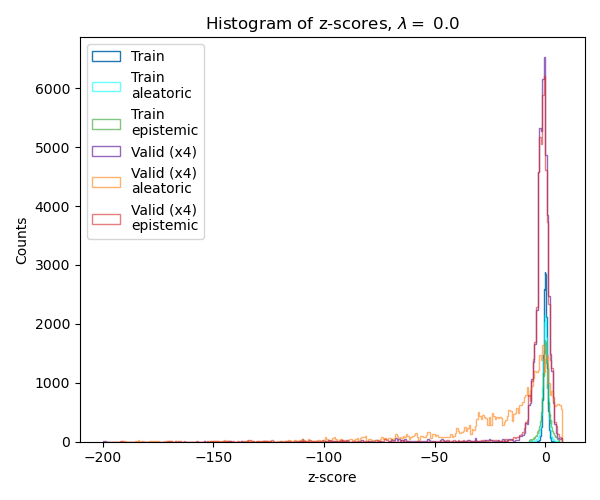

In [396]:
i = 0
ens = ens_names[i]

plt.figure(figsize=(6,5))

zscore_counts, zscore_bins = np.histogram(zscore_train[ens], bins=300)
plt.hist(zscore_bins[:-1], zscore_bins, weights=zscore_counts, histtype='step', label='Train');

zscore_counts, zscore_bins = np.histogram(zscore_train_aleatoric[ens], bins=zscore_bins)
plt.hist(zscore_bins[:-1], zscore_bins, weights=zscore_counts, histtype='step', label='Train \naleatoric', color='cyan', alpha=0.6);

zscore_counts, zscore_bins = np.histogram(zscore_train_epistemic[ens], bins=zscore_bins)
plt.hist(zscore_bins[:-1], zscore_bins, weights=zscore_counts, histtype='step', label='Train \nepistemic', color='tab:green', alpha=0.6);


zscore_counts, zscore_bins = np.histogram(zscore_valid[ens], bins=300)
plt.hist(zscore_bins[:-1], zscore_bins, weights= 4 * zscore_counts, histtype='step', label='Valid (x4)', color='tab:purple');

zscore_counts, zscore_bins = np.histogram(zscore_valid_aleatoric[ens], bins=zscore_bins)
plt.hist(zscore_bins[:-1], zscore_bins, weights= 4 * zscore_counts, histtype='step', label='Valid (x4)\naleatoric', color='tab:orange', alpha=0.6);

zscore_counts, zscore_bins = np.histogram(zscore_valid_epistemic[ens], bins=zscore_bins)
plt.hist(zscore_bins[:-1], zscore_bins, weights= 4 * zscore_counts, histtype='step', label='Valid (x4)\nepistemic', color='tab:red', alpha=0.6);

# plt.yscale('log')

plt.title('Histogram of z-scores, $\lambda=$ {}'.format(wd[i]))
plt.xlabel('z-score')
plt.ylabel('Counts')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('plots/beta-NLL_wd-scan/z-score_wd-0.01_big.pdf')

# Comparing losses

## Averaged prediction

In [397]:
loss_train = {}
loss_valid = {}

for ens in ens_names:
    loss_train[ens] = np.mean((np.mean(prediction_train[ens][:, :, 0], axis=0) - train_npz['y']) ** 2)
    loss_valid[ens] = np.mean((np.mean(prediction_valid[ens][:, :, 0], axis=0) - valid_npz['y']) ** 2)
    print('===========' + ens + '===========')
    print('\tTrain MSE: ', end='')
    print(loss_train[ens])
    print('\tValid MSE: ', end='')
    print(loss_valid[ens])

===========beta-NLL_wd-0.0===========
	Train MSE: 9.075487e-06
	Valid MSE: 0.0018531148
===========beta-NLL_wd-0.01===========
	Train MSE: 9.618838e-06
	Valid MSE: 0.001891036
===========beta-NLL_wd-0.1===========
	Train MSE: 1.45498125e-05
	Valid MSE: 0.0018629982
===========beta-NLL_wd-1.0===========
	Train MSE: 6.0790393e-05
	Valid MSE: 0.0017871676
===========beta-NLL_wd-2.0===========
	Train MSE: 0.00010866674
	Valid MSE: 0.0023610776
===========beta-NLL_wd-4.0===========
	Train MSE: 0.00021327421
	Valid MSE: 0.0027956509
===========beta-NLL_wd-6.0===========
	Train MSE: 0.00032819167
	Valid MSE: 0.0034388306
===========beta-NLL_wd-8.0===========
	Train MSE: 0.00049538445
	Valid MSE: 0.004290618
===========beta-NLL_wd-10.0===========
	Train MSE: 0.0007034248
	Valid MSE: 0.0050602756
===========beta-NLL_wd-20.0===========
	Train MSE: 0.0016112126
	Valid MSE: 0.0037219918
===========beta-NLL_wd-30.0===========
	Train MSE: 0.0027706546
	Valid MSE: 0.0037610442
===========beta-NLL_wd-

# Weight decay comparison

In [215]:
np.array(losses_valid[ens])

(5, 18500, 4)

In [219]:
[np.std(np.array(losses_valid[ens])[:, -1, 3]) for ens in ens_names]

[0.00035891117,
 0.00030376334,
 0.00021757153,
 0.00037566983,
 0.0004768809,
 0.0003608555,
 0.0007107744,
 0.00024269009,
 7.0647126e-05,
 0.010668231,
 0.00015913091]

<IPython.core.display.Javascript object>


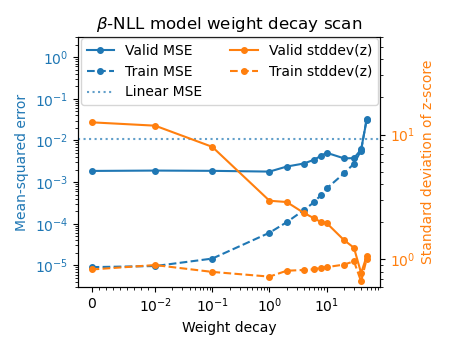

In [449]:
fig, ax = plt.subplots(figsize=(4.5,3.5))
ax.plot([w for w in wd],  [loss_valid[ens] for ens in ens_names], color='tab:blue', label='Valid MSE', marker='o', markersize='4')
ax.plot([w for w in wd],  [loss_train[ens] for ens in ens_names], color='tab:blue', linestyle='dashed', label='Train MSE', marker='o', markersize='4')

# ax.errorbar([w for w in wd], [loss_valid[ens] for ens in ens_names],
#                 [np.std(np.array(losses_valid[ens])[:, -1, 3]) for ens in ens_names],
#                 label='Valid MSE', alpha=0.5)

# ax.plot([w for w in wd],  [np.mean(zscore_valid[ens]) for ens in ens_names], color='tab:blue', label='Valid mean(z)', marker='o', markersize='4')
# ax.plot([w for w in wd],  [np.mean(zscore_train[ens]) for ens in ens_names], color='tab:blue', linestyle='dashed', label='Train mean(z)', marker='o', markersize='4')

ax.axhline(0.011, color='tab:blue', linestyle='dotted', alpha=0.7, label='Linear MSE')

# ax.set_xscale('log')
ax.set_xscale(matplotlib.scale.SymmetricalLogScale(ax, base=10, linthresh=1e-2))
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator( np.concatenate([np.linspace(0, 1e-2, 10),
                                                                           np.linspace(1e-2, 1e-1, 10),
                                                                           np.linspace(1e-1, 1e0, 10),
                                                                           np.linspace(1e0, 1e1, 10),
                                                                           np.linspace(1e1, 1e2, 10)])))

ax1 = ax.twinx()
ax1.plot([w for w in wd],  [np.std(zscore_valid[ens]) for ens in ens_names], color='tab:orange', label='Valid stddev(z)', marker='o', markersize='4')
ax1.plot([w for w in wd],  [np.std(zscore_train[ens]) for ens in ens_names], color='tab:orange', linestyle='dashed', label='Train stddev(z)', marker='o', markersize='4')

ax.set_yscale('log')
ax1.set_yscale('log')

ax.set_ylim(3e-6, 3e0)
# ax.set_ylim(-2.1, 1.8)
ax1.set_ylim(0.6, 6e1)

ax.tick_params(labelcolor='tab:blue')
ax1.tick_params(labelcolor='tab:orange')
[t.set_color('black') for t in ax.xaxis.get_ticklabels()]

ax.set_ylabel('Mean-squared error', color='tab:blue')
ax1.set_ylabel('Standard deviation of z-score', color='tab:orange')
ax.set_xlabel('Weight decay')

# ax.axvline(1.0, color='black', linestyle='dotted', zorder=0)

plt.title(r"$\beta$-NLL model weight decay scan")

fig.legend(loc=(0.18,0.7), ncols=2)
plt.tight_layout()

# plt.savefig('plots/beta-NLL_wd-scan/beta-NLL_wd_model_performance.pdf')

# Stuff under here is unused